IMPORTING LIBRARIES

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go

In [46]:
import sys

IMPORTING DATASET

In [47]:
sys.path.append('d:\\pyusb-1.0.0a2\\usb')
data=pd.read_csv("C:\\Users\\mkg_g\\OneDrive\\Desktop\\Bangalore_1990_2022_BangaloreCity.csv")

In [48]:
df=pd.DataFrame(data)

In [49]:
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


EXPLORATORY DATA ANALYSIS

In [50]:
df.isnull().sum()

time       0
tavg      70
tmin    1389
tmax     629
prcp    4620
dtype: int64

In [51]:
df['tavg'].fillna(df['tavg'].mean().round(2), inplace=True)
df['tmin'].fillna(df['tmin'].mean().round(2), inplace=True)
df['tmax'].fillna(df['tmax'].mean().round(2), inplace=True)
df['prcp'].fillna(df['prcp'].mean().round(2), inplace=True)

In [52]:
df

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.10,28.4,4.41
1,02-01-1990,21.7,19.39,26.5,0.00
2,03-01-1990,21.0,16.40,26.5,0.00
3,04-01-1990,20.8,19.39,27.4,0.00
4,05-01-1990,20.4,14.20,26.1,0.00
...,...,...,...,...,...
11889,21-07-2022,23.7,20.50,30.8,82.50
11890,22-07-2022,23.2,21.10,27.9,0.00
11891,23-07-2022,23.1,20.90,26.7,0.00
11892,24-07-2022,22.8,20.00,26.7,0.30


In [53]:
df.isnull().any()

time    False
tavg    False
tmin    False
tmax    False
prcp    False
dtype: bool

DATA OUTLIERS

<Axes: >

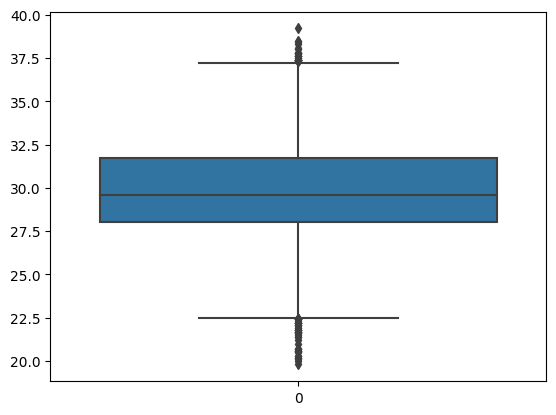

In [54]:
sns.boxplot(df['tmax'])

<Axes: >

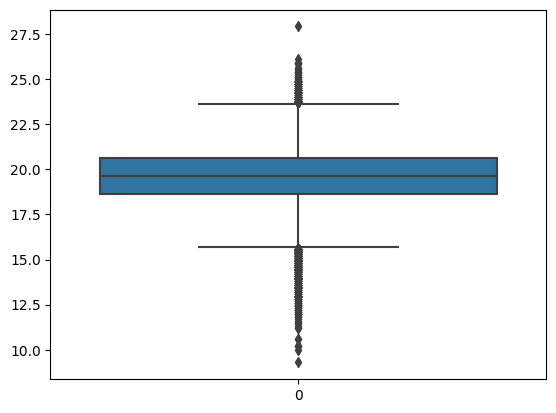

In [55]:
sns.boxplot(df['tmin'])

<Axes: >

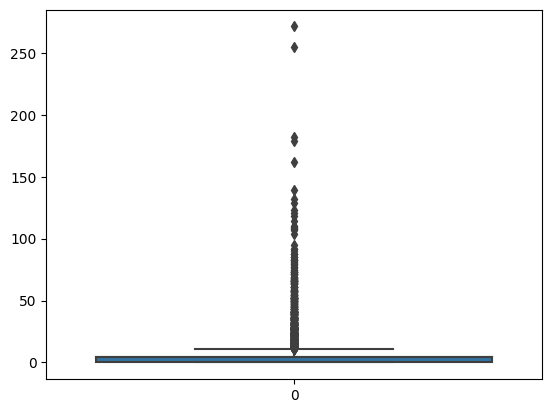

In [56]:
sns.boxplot(df['prcp'])

In [57]:
df = df[(df['prcp'] >= 0) & (df['prcp'] <= 10) & (df['tmax'] >= 22.5) & (df['tmax'] <= 37.5) & (df['tmin'] >= 15) & (df['tmin'] <= 23.75)]

CORRELATION

In [58]:
factors=df[['tavg','tmin','tmax','prcp']]

In [59]:
factors.corr().style.background_gradient(cmap='Oranges')

,tavg,tmin,tmax,prcp
tavg,1.000000,0.656499,0.863155,0.004429
tmin,0.656499,1.000000,0.409097,-0.024904
tmax,0.863155,0.409097,1.000000,0.049039
prcp,0.004429,-0.024904,0.049039,1.000000


In [60]:
df['time'] = pd.to_datetime(df['time'],dayfirst=True)
df['year']=df['time'].dt.year

C:\Users\mkg_g\AppData\Local\Temp\ipykernel_20452\2117401188.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mkg_g\AppData\Local\Temp\ipykernel_20452\2117401188.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df

,time,tavg,tmin,tmax,prcp,year
0,1990-01-01,22.9,19.10,28.4,4.41,1990
1,1990-01-02,21.7,19.39,26.5,0.00,1990
2,1990-01-03,21.0,16.40,26.5,0.00,1990
3,1990-01-04,20.8,19.39,27.4,0.00,1990
5,1990-01-06,20.4,17.10,24.2,4.41,1990
...,...,...,...,...,...,...
11888,2022-07-20,24.9,19.80,30.8,0.00,2022
11890,2022-07-22,23.2,21.10,27.9,0.00,2022
11891,2022-07-23,23.1,20.90,26.7,0.00,2022
11892,2022-07-24,22.8,20.00,26.7,0.30,2022


In [62]:
df1=df[['tavg','tmin','tmax','prcp','year']]

In [63]:
df1

,tavg,tmin,tmax,prcp,year
0,22.9,19.10,28.4,4.41,1990
1,21.7,19.39,26.5,0.00,1990
2,21.0,16.40,26.5,0.00,1990
3,20.8,19.39,27.4,0.00,1990
5,20.4,17.10,24.2,4.41,1990
...,...,...,...,...,...
11888,24.9,19.80,30.8,0.00,2022
11890,23.2,21.10,27.9,0.00,2022
11891,23.1,20.90,26.7,0.00,2022
11892,22.8,20.00,26.7,0.30,2022


In [64]:
df1=df1.groupby('year').mean().reset_index()

In [65]:
df1

,year,tavg,tmin,tmax,prcp
0,1990,23.904875,19.533219,29.592656,1.382656
1,1991,23.878769,19.340554,29.735354,1.395938
2,1992,23.673072,19.404085,29.618889,1.170359
3,1993,23.987935,19.257194,29.942452,1.131774
4,1994,23.755235,19.408182,29.543009,1.148715
5,1995,24.159032,19.522871,29.737548,1.189000
6,1996,23.983684,19.429079,30.094375,1.167039
7,1997,23.801511,19.567583,30.063263,1.265982
8,1998,24.246814,19.794890,30.203060,1.141703
9,1999,23.797035,19.308139,29.835615,2.871199


In [66]:
fig = px.bar(df1, x='year', y='tavg', color='year', title='Annual Temperature over the years 1990-2022')
fig.show()

In [67]:
df.shape

(10210, 6)

DATA PREPROCESSING

In [68]:
x=factors.iloc[:,[1,2,3]]
y=factors.iloc[:,0]

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x1 = poly.fit_transform(x)

In [70]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)
print(y)


[49 37 30 ... 51 48 62]


In [71]:
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(x1,y)
print(sorted(Counter(y_res).items()),y_res.shape)

[(0, 250), (1, 250), (2, 250), (3, 250), (4, 250), (5, 250), (6, 250), (7, 250), (8, 250), (9, 250), (10, 250), (11, 250), (12, 250), (13, 250), (14, 250), (15, 250), (16, 250), (17, 250), (18, 250), (19, 250), (20, 250), (21, 250), (22, 250), (23, 250), (24, 250), (25, 250), (26, 250), (27, 250), (28, 250), (29, 250), (30, 250), (31, 250), (32, 250), (33, 250), (34, 250), (35, 250), (36, 250), (37, 250), (38, 250), (39, 250), (40, 250), (41, 250), (42, 250), (43, 250), (44, 250), (45, 250), (46, 250), (47, 250), (48, 250), (49, 250), (50, 250), (51, 250), (52, 250), (53, 250), (54, 250), (55, 250), (56, 250), (57, 250), (58, 250), (59, 250), (60, 250), (61, 250), (62, 250), (63, 250), (64, 250), (65, 250), (66, 250), (67, 250), (68, 250), (69, 250), (70, 250), (71, 250), (72, 250), (73, 250), (74, 250), (75, 250), (76, 250), (77, 250), (78, 250), (79, 250), (80, 250), (81, 250), (82, 250), (83, 250), (84, 250), (85, 250), (86, 250), (87, 250), (88, 250), (89, 250), (90, 250), (91, 250

TRAINING AND TESTING DATA

In [72]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x_res, y_res, test_size= 0.10, random_state=0)  
    
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [73]:
x_train

array([[ 0.        , -0.14543486, -0.99069689, ..., -0.99538818,
        -0.95345253, -0.8011705 ],
       [ 0.        ,  1.12983054,  1.48299824, ...,  1.56398473,
        -0.95345253, -0.8011705 ],
       [ 0.        ,  1.638242  ,  0.68420086, ...,  0.65305488,
        -0.95345253, -0.8011705 ],
       ...,
       [ 0.        ,  1.00272768,  0.50382725, ...,  0.45851136,
        -0.4884075 , -0.72048877],
       [ 0.        , -2.00537342, -1.42874707, ..., -1.36808512,
         0.62845202,  0.76793602],
       [ 0.        ,  0.66378671, -0.83609095, ..., -0.85806333,
         1.0422712 ,  1.29736152]])

In [74]:
y_train

array([ 22, 126, 101, ...,  88,   2,  51], dtype=int64)

MODEL SELECTION AND PREDICTION

In [75]:
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 10)  
classifier.fit(x_train, y_train)  

RandomForestClassifier(n_estimators=10)

In [76]:
y_pred= classifier.predict(x_test)  

In [77]:
y_pred

array([  7,  92,   3, ...,   4, 122, 106], dtype=int64)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100 

71.23664122137404

In [79]:
from sklearn.linear_model import TheilSenRegressor

regressor = TheilSenRegressor()

regressor.fit(x_train, y_train)

y_pred3 = regressor.predict(x_test)

In [80]:
y_pred3

array([ 32.0093325 ,  93.06225547,  55.71918568, ...,  35.4904772 ,
       103.44536253, 112.95549426])

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred3)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 9.510601238176873
Mean Squared Error: 179.76565185245758
Root Mean Squared Error: 13.40767138068567
R-squared Score: 0.8736005074500542


In [82]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0, random_state=42)

lasso.fit(x_train, y_train)

y_pred4 = lasso.predict(x_test)
rmse = np.sqrt(mse)

mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Absolute Error: 9.586197085540466
Mean Squared Error: 186.2122031781766
Root Mean Squared Error: 13.40767138068567
R-squared Score: 0.8690677126259527


In [83]:
import xgboost

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(x_train, y_train)
preds = xgb.predict(x_test)
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

In [85]:
acc_xgb

65.58778625954199

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(x_train, y_train)
y_pred2 = model.predict(x_test)

In [87]:
y_pred2

array([  7,  92,   3, ...,   4, 122, 106], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred2)*100

71.20610687022901

In [89]:
factors.corr()


,tavg,tmin,tmax,prcp
tavg,1.000000,0.656499,0.863155,0.004429
tmin,0.656499,1.000000,0.409097,-0.024904
tmax,0.863155,0.409097,1.000000,0.049039
prcp,0.004429,-0.024904,0.049039,1.000000


DATA VISUALIZATION

In [90]:

p1=go.Pie(labels=df1['year'], values=df1['tmax'].round(2),title='comparision of tmax per year')
fig=go.Figure(p1)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [91]:

p2=go.Pie(labels=df1['year'], values=df1['tmin'].round(2),title='comparision of tmin per year')
fig=go.Figure(p2)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

In [92]:
p3=go.Pie(labels=df1['year'], values=df1['prcp'].round(2),title='comparision of prcp per year')
fig=go.Figure(p3)
fig.update_traces(textposition='inside')
fig=fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

<Axes: >

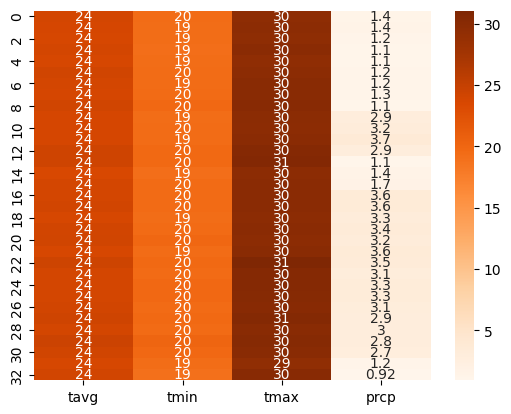

In [93]:
sns.heatmap(data=df1[['tavg','tmin','tmax','prcp']],cmap='Oranges',annot=True)